In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-04-01 22:26:19--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-04-01 22:26:19--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-04-01 22:26:19 (7.20 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [3]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [4]:
data.shape

(4238, 16)

#### Medidas de tendencia central de las variables.

In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

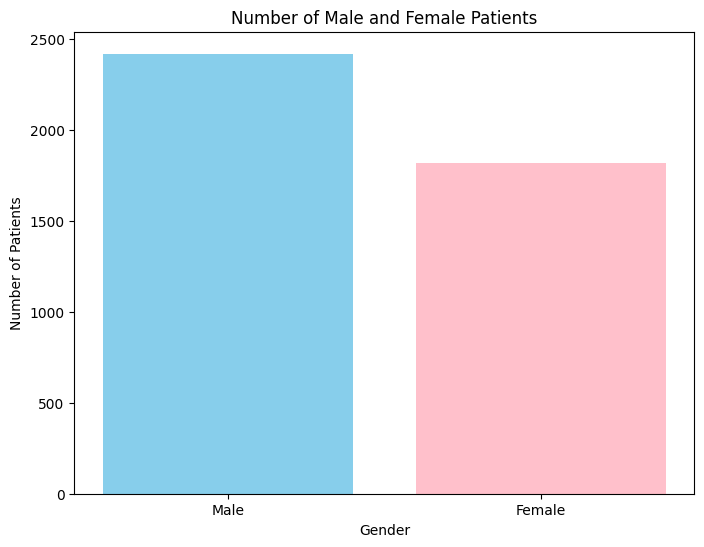

In [11]:
import matplotlib.pyplot as plt

gender_counts = data['male'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])
plt.xticks(gender_counts.index, ['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Number of Male and Female Patients")
plt.show()

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



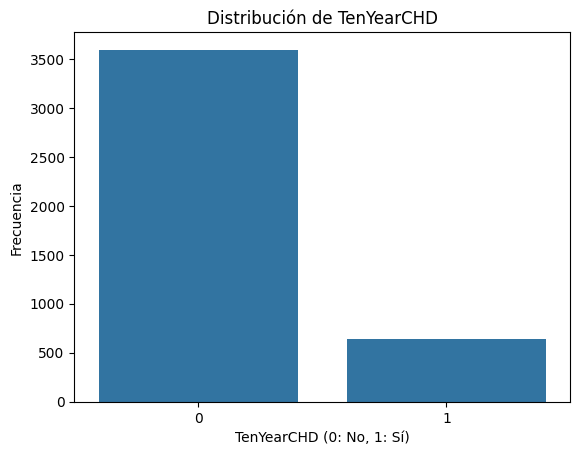

In [8]:
sns.countplot(x='TenYearCHD', data=data)
plt.title('Distribución de TenYearCHD')
plt.xlabel('TenYearCHD (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.show()

#### Realice un grafico de densidad del BMI

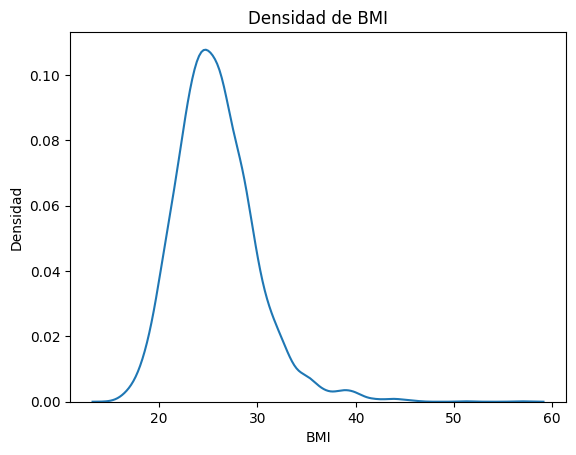

In [9]:
sns.kdeplot(data['BMI'])
plt.title('Densidad de BMI')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.show()

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

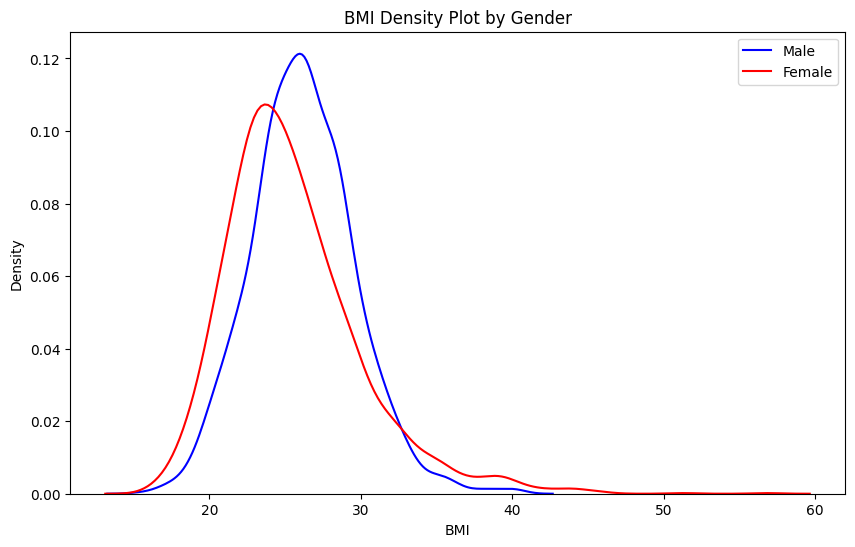

Average BMI for males: 26.19
Average BMI for females: 25.51
Males have a higher average BMI.


In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['male'] == 1]['BMI'], label='Male', color='blue')
sns.kdeplot(data[data['male'] == 0]['BMI'], label='Female', color='red')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Density Plot by Gender')
plt.legend()
plt.show()

average_bmi_male = data[data['male'] == 1]['BMI'].mean()
average_bmi_female = data[data['male'] == 0]['BMI'].mean()

print(f"Average BMI for males: {average_bmi_male:.2f}")
print(f"Average BMI for females: {average_bmi_female:.2f}")

if average_bmi_male > average_bmi_female:
    print("Males have a higher average BMI.")
elif average_bmi_female > average_bmi_male:
    print("Females have a higher average BMI.")
else:
    print("Males and females have the same average BMI.")


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

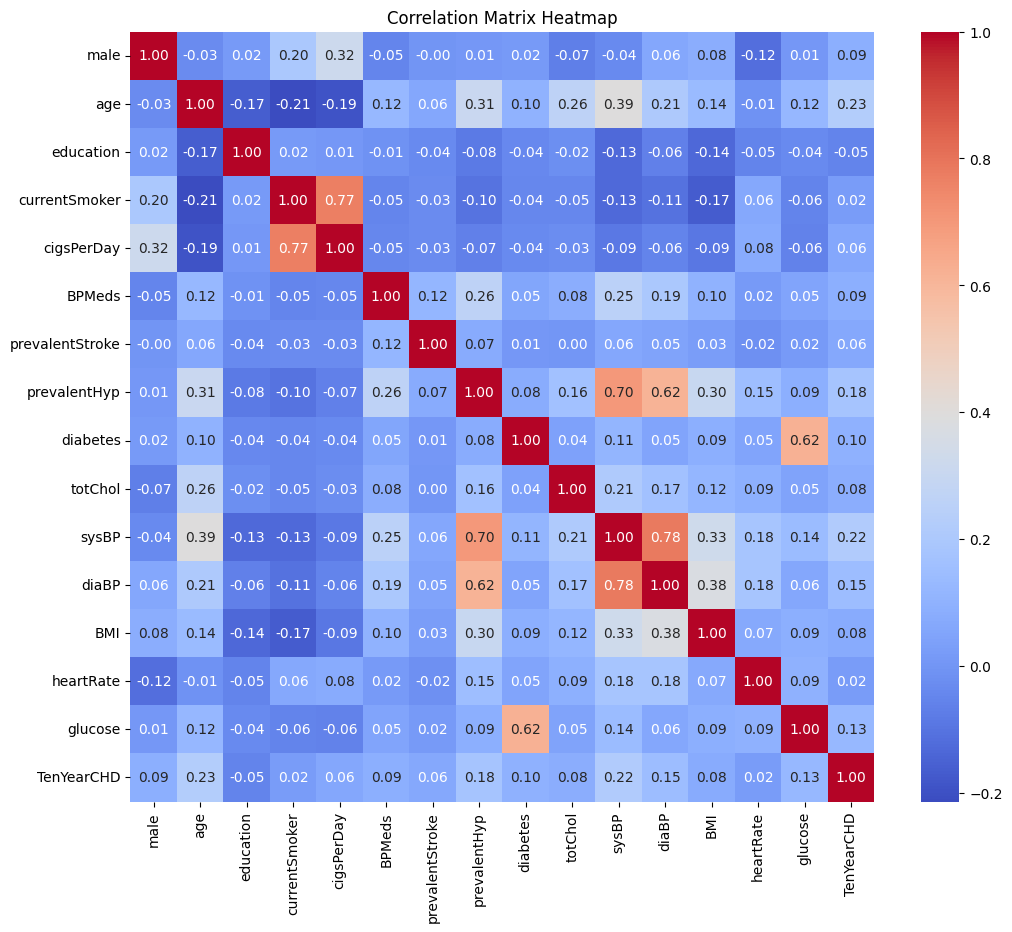

The most correlated pair of variables is: sysBP and diaBP, with a correlation of 0.78


In [15]:
import numpy as np

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

correlation_matrix = data.corr().abs()
np.fill_diagonal(correlation_matrix.values, 0)

max_value = np.max(correlation_matrix)
row_max, col_max = correlation_matrix[correlation_matrix == max_value].stack().idxmax()

print(f"The most correlated pair of variables is: {row_max} and {col_max}, with a correlation of {max_value:.2f}")

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

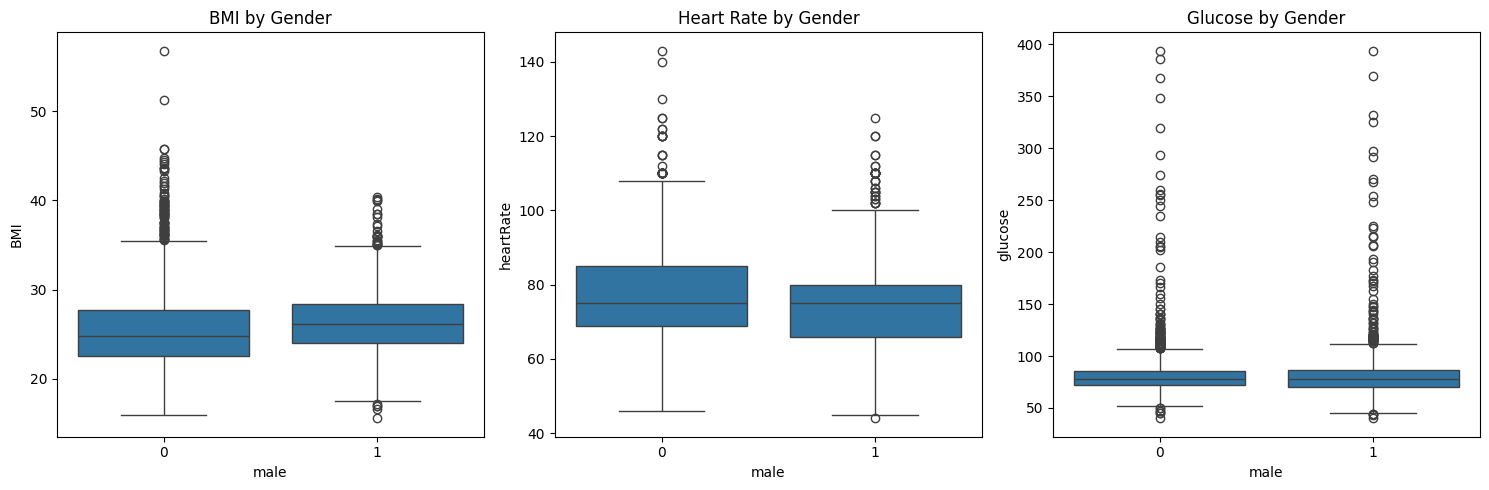

       count       mean       std    min    25%     50%      75%    max
male                                                                   
0     2405.0  25.512636  4.495204  15.96  22.54  24.750  27.7100  56.80
1     1814.0  26.185656  3.417345  15.54  23.96  26.085  28.3475  40.38

BMI Outliers:
35      38.53
37      40.11
78      45.80
87      38.46
108     40.52
        ...  
4001    41.66
4132    38.17
4190    36.07
4215    39.17
4228    43.67
Name: BMI, Length: 97, dtype: float64

Heart Rate Outliers:
162     110.0
270     110.0
339     140.0
358     130.0
382     108.0
        ...  
3957    110.0
3964    110.0
4053    125.0
4070    125.0
4164    112.0
Name: heartRate, Length: 76, dtype: float64

Glucose Outliers:
22      113.0
37      225.0
44      215.0
65       45.0
66      202.0
        ...  
4115    118.0
4118    113.0
4203    120.0
4209    116.0
4228    260.0
Name: glucose, Length: 188, dtype: float64


In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='male', y='BMI', data=data)
plt.title('BMI by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Heart Rate by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Glucose by Gender')

plt.tight_layout()
plt.show()

bmi_stats = data.groupby('male')['BMI'].describe()
print(bmi_stats)

def find_outliers_iqr(data_column):
    q1 = data_column.quantile(0.25)
    q3 = data_column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers

print("\nBMI Outliers:")
print(find_outliers_iqr(data['BMI']))

print("\nHeart Rate Outliers:")
print(find_outliers_iqr(data['heartRate']))

print("\nGlucose Outliers:")
print(find_outliers_iqr(data['glucose']))


### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [17]:
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [18]:
data_dropped = data.dropna()
print(f"Number of rows remaining after dropping NaN values: {data_dropped.shape[0]}")

Number of rows remaining after dropping NaN values: 3656


#### Seleccione sus variables X y su variable y

In [19]:
X = data_dropped[['age', 'male', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                  'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
                  'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data_dropped['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2559, 14)
y_train shape: (2559,)
X_test shape: (1097, 14)
y_test shape: (1097,)


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [23]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
print(coefficients)

max_coef_feature = coefficients.loc[coefficients['Coefficient'].abs().idxmax(), 'Feature']
max_coef_value = coefficients.loc[coefficients['Coefficient'].abs().idxmax(), 'Coefficient']

print(f"\nLa variable con mayor efecto sobre el desarrollo de una enfermedad cardíaca es '{max_coef_feature}' con un coeficiente de {max_coef_value:.4f}")

            Feature  Coefficient
0               age     0.031793
1              male     0.436823
2     currentSmoker    -0.245376
3        cigsPerDay     0.026226
4            BPMeds     0.121671
5   prevalentStroke     0.093676
6      prevalentHyp     0.867779
7          diabetes     0.168538
8           totChol    -0.001232
9             sysBP     0.015960
10            diaBP    -0.032457
11              BMI    -0.042297
12        heartRate    -0.027346
13          glucose     0.004576

La variable con mayor efecto sobre el desarrollo de una enfermedad cardíaca es 'prevalentHyp' con un coeficiente de 0.8678


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matriz de confusión:
[[915   3]
 [173   6]]

Accuracy: 0.8396
Recall: 0.0335
Precision: 0.6667
F1-score: 0.0638


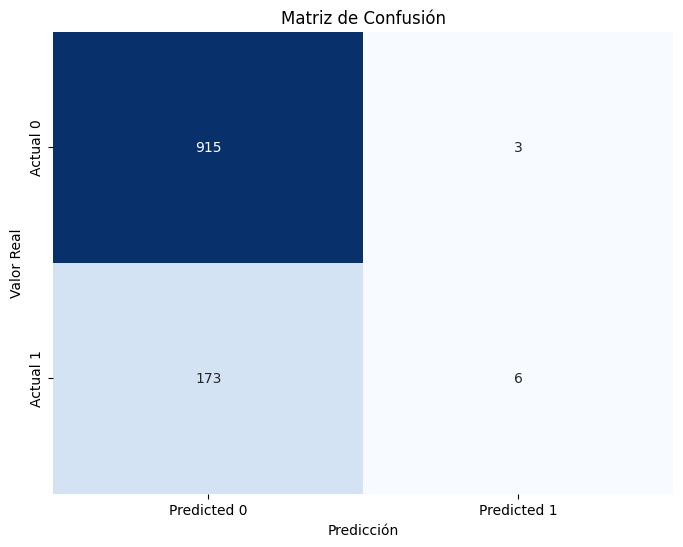

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

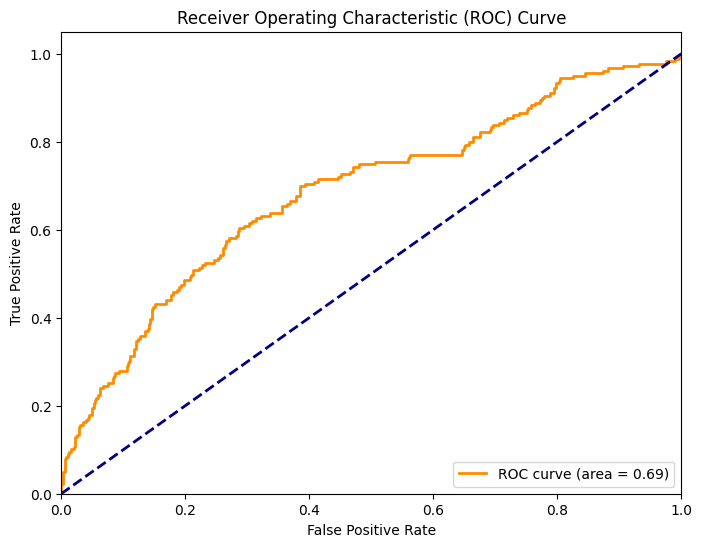

AUC: 0.69


In [27]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")

## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

Matriz de confusión:
[[579 351]
 [ 78  89]]

Accuracy: 0.6089
Recall: 0.5329
Precision: 0.2023
F1-score: 0.2932


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


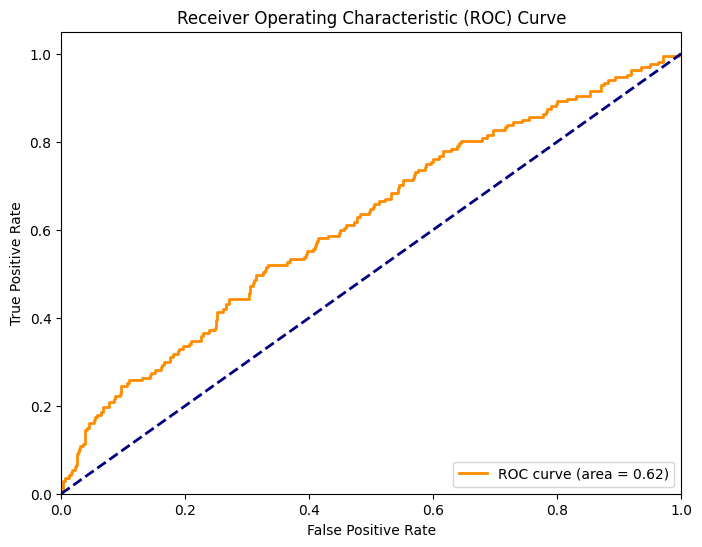

AUC: 0.62


In [29]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")


## Pinter el resultado con SMOTE y sin SMOTE

In [32]:
print("Resultados sin SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.2f}")

print("\nResultados con SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.2f}")

Resultados sin SMOTE:
Accuracy: 0.6089
Recall: 0.5329
Precision: 0.2023
F1-score: 0.2932
AUC: 0.62

Resultados con SMOTE:
Accuracy: 0.6089
Recall: 0.5329
Precision: 0.2023
F1-score: 0.2932
AUC: 0.62


### Como mejora su modelo con StandardScaler()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Matriz de confusión (con StandardScaler):
[[618 312]
 [ 72  95]]

Accuracy (con StandardScaler): 0.6500
Recall (con StandardScaler): 0.5689
Precision (con StandardScaler): 0.2334
F1-score (con StandardScaler): 0.3310


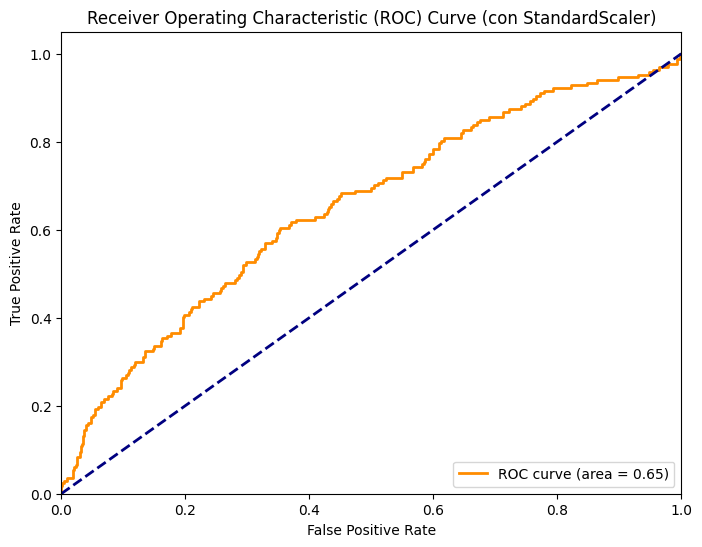

AUC (con StandardScaler): 0.65


In [35]:
X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train_resampled)

y_pred_scaled = logreg_scaled.predict(X_test_scaled)

cm_scaled = confusion_matrix(y_test, y_pred_scaled)
print("Matriz de confusión (con StandardScaler):")
print(cm_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"\nAccuracy (con StandardScaler): {accuracy_scaled:.4f}")

recall_scaled = recall_score(y_test, y_pred_scaled)
print(f"Recall (con StandardScaler): {recall_scaled:.4f}")

precision_scaled = precision_score(y_test, y_pred_scaled)
print(f"Precision (con StandardScaler): {precision_scaled:.4f}")

f1_scaled = f1_score(y_test, y_pred_scaled)
print(f"F1-score (con StandardScaler): {f1_scaled:.4f}")

y_pred_prob_scaled = logreg_scaled.predict_proba(X_test_scaled)[:, 1]
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_pred_prob_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

plt.figure(figsize=(8, 6))
plt.plot(fpr_scaled, tpr_scaled, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_scaled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (con StandardScaler)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC (con StandardScaler): {roc_auc_scaled:.2f}")


### Pinte todas las graficas original SMOTE y SMOTE Scaler

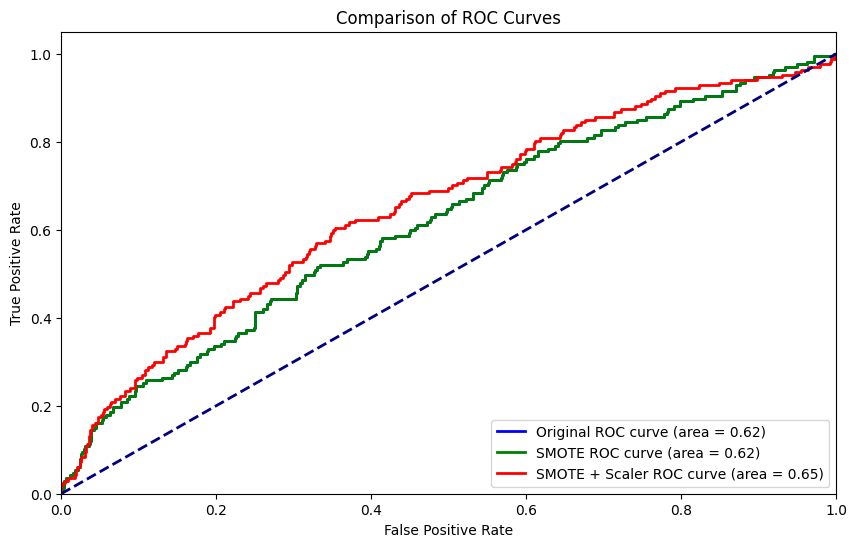

In [36]:
plt.figure(figsize=(10, 6))

plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original ROC curve (area = {roc_auc:.2f})')

plt.plot(fpr, tpr, color='green', lw=2, label=f'SMOTE ROC curve (area = {roc_auc:.2f})')  # Assuming the same variables as before, replace if needed

plt.plot(fpr_scaled, tpr_scaled, color='red', lw=2, label=f'SMOTE + Scaler ROC curve (area = {roc_auc_scaled:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.show()
